# CSE910 HW4
Jeremy Arsenault
**********************

In [1]:
##################################################
# 03/16/2023
# This code is for CSE 910 PROJECT 4
# Author: H. Zeng
##################################################

import numpy as np
import matplotlib.pyplot as plt
import pdb

###########################################
# generate subcarrier positions
###########################################
valid_sc = np.arange(-26, 26)
valid_sc = np.delete(valid_sc, 26)
valid_sc[valid_sc < 0] += 64
payload_sc = [-26, -25, -24, -23, -22, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -6, -5, -4, -3, -2, -1,  1, 2, 3, 4, 5, 6,  8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,  22, 23, 24, 25, 26]
payload_sc = np.array(payload_sc)
payload_sc[payload_sc < 0] += 64
pilot_sc = np.array([-21, -7, 7, 21])
pilot_sc[pilot_sc < 0] += 64


###########################################
# preamble data (given)
###########################################
legacy_freq_preamble = [
[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [1.472, 1.472], [0, 0], [0, 0], [0, 0], [-1.472, -1.472], [0, 0], [0, 0], [0, 0], [1.472, 1.472], [0, 0], [0, 0], [0, 0], [-1.472, -1.472], [0, 0], [0, 0], [0, 0], [-1.472, -1.472], [0, 0], [0, 0], [0, 0], [1.472, 1.472], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [-1.472, -1.472], [0, 0], [0, 0], [0, 0], [-1.472, -1.472], [0, 0], [0, 0], [0, 0], [1.472, 1.472], [0, 0], [0, 0], [0, 0], [1.472, 1.472], [0, 0], [0, 0], [0, 0], [1.472, 1.472], [0, 0], [0, 0], [0, 0], [1.472, 1.472], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]], 
[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [1.472, 1.472], [0, 0], [0, 0], [0, 0], [-1.472, -1.472], [0, 0], [0, 0], [0, 0], [1.472, 1.472], [0, 0], [0, 0], [0, 0], [-1.472, -1.472], [0, 0], [0, 0], [0, 0], [-1.472, -1.472], [0, 0], [0, 0], [0, 0], [1.472, 1.472], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [-1.472, -1.472], [0, 0], [0, 0], [0, 0], [-1.472, -1.472], [0, 0], [0, 0], [0, 0], [1.472, 1.472], [0, 0], [0, 0], [0, 0], [1.472, 1.472], [0, 0], [0, 0], [0, 0], [1.472, 1.472], [0, 0], [0, 0], [0, 0], [1.472, 1.472], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]], 
[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [-1, 0], [0, 1], [-1, 0], [0, 1], [-1, 0], [0, 1], [-1, 0], [0, -1], [1, 0], [0, 1], [1, 0], [0, -1], [-1, 0], [0, 1], [1, 0], [0, 1], [1, 0], [0, 1], [1, 0], [0, 1], [-1, 0], [0, -1], [1, 0], [0, -1], [-1, 0], [0, 1], [0, 0], [0, -1], [1, 0], [0, -1], [1, 0], [0, -1], [1, 0], [0, 1], [-1, 0], [0, -1], [1, 0], [0, -1], [-1, 0], [0, 1], [1, 0], [0, 1], [1, 0], [0, 1], [1, 0], [0, 1], [-1, 0], [0, -1], [1, 0], [0, 1], [1, 0], [0, -1], [-1, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]], 
[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [1, 0], [1, 0], [-1, 0], [-1, 0], [1, 0], [1, 0], [-1, 0], [1, 0], [-1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [-1, 0], [-1, 0], [1, 0], [1, 0], [-1, 0], [1, 0], [-1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 0], [1, 0], [-1, 0], [-1, 0], [1, 0], [1, 0], [-1, 0], [1, 0], [-1, 0], [1, 0], [-1, 0], [-1, 0], [-1, 0], [-1, 0], [-1, 0], [1, 0], [1, 0], [-1, 0], [-1, 0], [1, 0], [-1, 0], [1, 0], [-1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
];

vht_freq_preamble = [
[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [1, 0], [1, 0], [-1, 0], [-1, 0], [1, 0], [1, 0], [-1, 0], [1, 0], [-1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [-1, 0], [-1, 0], [1, 0], [1, 0], [-1, 0], [1, 0], [-1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 0], [1, 0], [-1, 0], [-1, 0], [1, 0], [1, 0], [-1, 0], [1, 0], [-1, 0], [1, 0], [-1, 0], [-1, 0], [-1, 0], [-1, 0], [-1, 0], [1, 0], [1, 0], [-1, 0], [-1, 0], [1, 0], [-1, 0], [1, 0], [-1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]
];


freq_pilot = [[1, 1, 1, -1], [1, 1, 1, -1], [1, 1, 1, -1], [1, 1, 1, -1], [-1, -1, -1, 1], [-1, -1, -1, 1], [-1, -1, -1, 1], [1, 1, 1, -1], [-1, -1, -1, 1], [-1, -1, -1, 1], [-1, -1, -1, 1], [-1, -1, -1, 1], [1, 1, 1, -1], [1, 1, 1, -1], [-1, -1, -1, 1], [1, 1, 1, -1], [-1, -1, -1, 1], [-1, -1, -1, 1], [1, 1, 1, -1], [1, 1, 1, -1], [-1, -1, -1, 1], [1, 1, 1, -1], [1, 1, 1, -1], [-1, -1, -1, 1], [1, 1, 1, -1], [1, 1, 1, -1], [1, 1, 1, -1], [1, 1, 1, -1], [1, 1, 1, -1], [1, 1, 1, -1], [-1, -1, -1, 1], [1, 1, 1, -1], [1, 1, 1, -1], [1, 1, 1, -1], [-1, -1, -1, 1], [1, 1, 1, -1], [1, 1, 1, -1], [-1, -1, -1, 1], [-1, -1, -1, 1], [1, 1, 1, -1], [1, 1, 1, -1], [1, 1, 1, -1], [-1, -1, -1, 1], [1, 1, 1, -1], [-1, -1, -1, 1], [-1, -1, -1, 1], [-1, -1, -1, 1], [1, 1, 1, -1], [-1, -1, -1, 1], [1, 1, 1, -1], [-1, -1, -1, 1], [-1, -1, -1, 1], [1, 1, 1, -1], [-1, -1, -1, 1], [-1, -1, -1, 1], [1, 1, 1, -1], [1, 1, 1, -1], [1, 1, 1, -1], [1, 1, 1, -1], [1, 1, 1, -1], [-1, -1, -1, 1], [-1, -1, -1, 1], [1, 1, 1, -1], [1, 1, 1, -1], [-1, -1, -1, 1], [-1, -1, -1, 1], [1, 1, 1, -1], [-1, -1, -1, 1], [1, 1, 1, -1], [-1, -1, -1, 1], [1, 1, 1, -1], [1, 1, 1, -1], [-1, -1, -1, 1], [-1, -1, -1, 1], [-1, -1, -1, 1], [1, 1, 1, -1], [1, 1, 1, -1], [-1, -1, -1, 1], [-1, -1, -1, 1], [-1, -1, -1, 1], [-1, -1, -1, 1], [1, 1, 1, -1], [-1, -1, -1, 1], [-1, -1, -1, 1], [1, 1, 1, -1], [-1, -1, -1, 1], [1, 1, 1, -1], [1, 1, 1, -1], [1, 1, 1, -1], [1, 1, 1, -1], [-1, -1, -1, 1], [1, 1, 1, -1], [-1, -1, -1, 1], [1, 1, 1, -1], [-1, -1, -1, 1], [1, 1, 1, -1], [-1, -1, -1, 1], [-1, -1, -1, 1], [-1, -1, -1, 1], [-1, -1, -1, 1], [-1, -1, -1, 1], [1, 1, 1, -1], [-1, -1, -1, 1], [1, 1, 1, -1], [1, 1, 1, -1], [-1, -1, -1, 1], [1, 1, 1, -1], [-1, -1, -1, 1], [1, 1, 1, -1], [1, 1, 1, -1], [1, 1, 1, -1], [-1, -1, -1, 1], [-1, -1, -1, 1], [1, 1, 1, -1], [-1, -1, -1, 1], [-1, -1, -1, 1], [-1, -1, -1, 1], [1, 1, 1, -1], [1, 1, 1, -1], [1, 1, 1, -1], [-1, -1, -1, 1], [-1, -1, -1, 1], [-1, -1, -1, 1], [-1, -1, -1, 1], [-1, -1, -1, 1], [-1, -1, -1, 1], [-1, -1, -1, 1]];
freq_pilot = np.array(freq_pilot)


###########################################
# system parameters
###########################################
fft_size = 64
cp_len = 16
symbol_len = fft_size + cp_len
num_ofdm_per_frame = 20
num_samp_per_frame = 1600


###########################################
# preprocess the preamble
###########################################
legacy_freq_preamble = np.array(legacy_freq_preamble)
legacy_freq_preamble = legacy_freq_preamble[:,:,0] + 1j*legacy_freq_preamble[:,:,1]
legacy_freq_preamble = np.concatenate((legacy_freq_preamble[:,32:], legacy_freq_preamble[:,0:32]), axis=1)
stf_freq = legacy_freq_preamble[0,:]
ltf_freq = legacy_freq_preamble[3,:]
vht_freq = ltf_freq


# time domain signal 
stf_time = np.fft.ifft(stf_freq)
ltf_time = np.fft.ifft(ltf_freq)
 

###########################################
# load rx signal 
###########################################
with open("rx_signal_ant1.dat", 'rb') as f:
    data = np.fromfile(f, dtype=np.float32)
    rx_signal = data[:20000:2] + 1j*data[1:20000:2]
    rx_signal_ant1 = np.array(rx_signal)
 
with open("rx_signal_ant2.dat", 'rb') as f:
    data = np.fromfile(f, dtype=np.float32)
    rx_signal = data[:20000:2] + 1j*data[1:20000:2]
    rx_signal_ant2 = np.array(rx_signal)

rx_signal =  []
rx_signal.append(rx_signal_ant1) 
rx_signal.append(rx_signal_ant2) 
rx_signal = np.array(rx_signal)

# get first symbol (Jeremy)
rx_signal = rx_signal[:,1500:3300]
rx_signal.shape

(2, 1800)

100


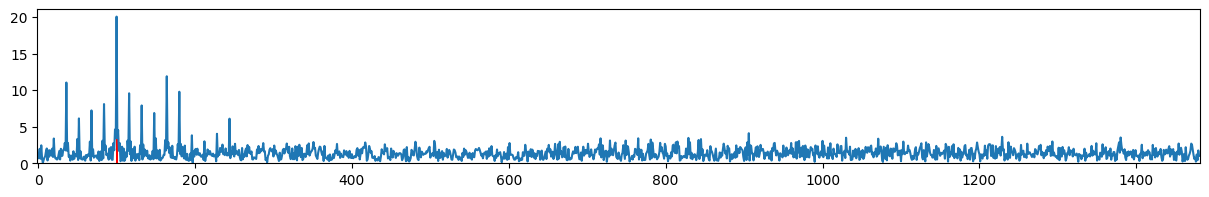

In [2]:
###########################################
# find the start of a frame 
###########################################

def plot_signal(signal, marker=None):
    fig, ax1 = plt.subplots(1,1,figsize=(15,2))
    x = np.arange(len(signal))
    ax1.plot(x,signal)
    if marker is not None:
        ax1.bar([marker],[max(signal)], color='red', width=2.5)
    ax1.set_xlim([-1,len(signal)])
    plt.show()
    
def freq2time(symbol):
    symbol = np.fft.ifft(symbol)
    return np.hstack([symbol[-cp_len:],symbol])

preamble = np.hstack([freq2time(x) for x in np.array(legacy_freq_preamble)])

corr1 = np.absolute(np.correlate(rx_signal[0], preamble))
corr2 = np.absolute(np.correlate(rx_signal[1], preamble))
corr = corr1 + corr2

start = np.argmax(corr)

print(start)
plot_signal(corr, marker=start)

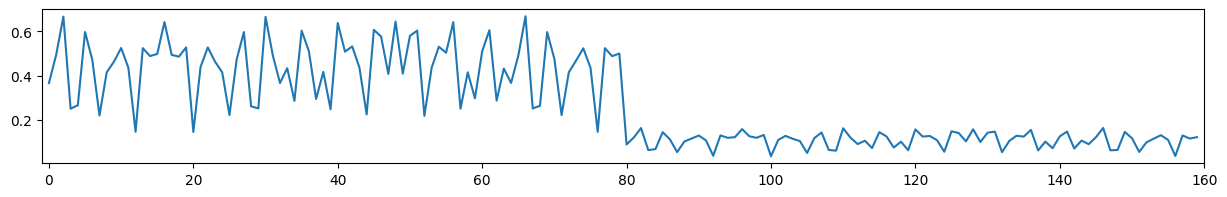

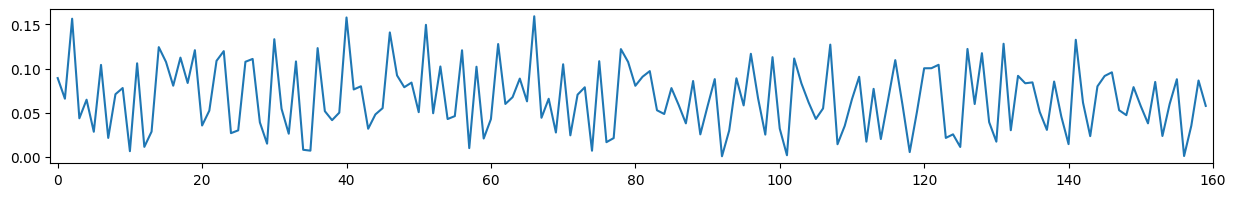

In [3]:
###########################################    
# extract one frame of signal 
###########################################
symbols_per_frame = 10

vht_rec = rx_signal[:,start+symbol_len*4:start+symbol_len*6]
payload = rx_signal[:,start+symbol_len*6:start+symbol_len*(6+symbols_per_frame)].reshape((2,symbols_per_frame,symbol_len))

plot_signal(np.absolute(vht_rec[0]))
plot_signal(np.absolute(vht_rec[1].real))

In [4]:
###########################################
# CFO estimation & compensation
###########################################
def cfo_est(symbol):
    a, b = symbol[:cp_len], symbol[-cp_len:]
    phi = np.angle((a*b.conj()).sum())
    return phi

def cfo_comp(symbol, phi):
    symbol = symbol[:,cp_len:]*np.exp(1j*phi*np.arange(fft_size)/fft_size)
    return symbol

vht_s1 = cfo_comp(vht_rec[:,:symbol_len], cfo_est(vht_rec[0,:symbol_len]))
vht_s2 = cfo_comp(vht_rec[:,symbol_len:], cfo_est(vht_rec[1,symbol_len:]))

payload_symbols = [payload[:,x,:] for x in range(symbols_per_frame)]
payload_symbols = [cfo_comp(x, (cfo_est(x[0])+cfo_est(x[1]))/2) for x in payload_symbols]

In [5]:
###########################################
# FFT
###########################################
vht_s1 = np.fft.fft(vht_s1)
vht_s2 = np.fft.fft(vht_s2)

payload_symbols = [np.fft.fft(x) for x in payload_symbols]

In [6]:
###########################################
# channel estimation & equalization  
###########################################

y1 = np.vstack([vht_freq, np.zeros(fft_size)]).T
y2 = np.vstack([np.zeros(fft_size), vht_freq]).T
y = np.vstack([y1,y2])

x = np.vstack([vht_s1.T,vht_s2.T])

H_inv = np.linalg.lstsq(x, y, rcond=None)[0].T

payload_symbols = [H_inv@x for x in payload_symbols]

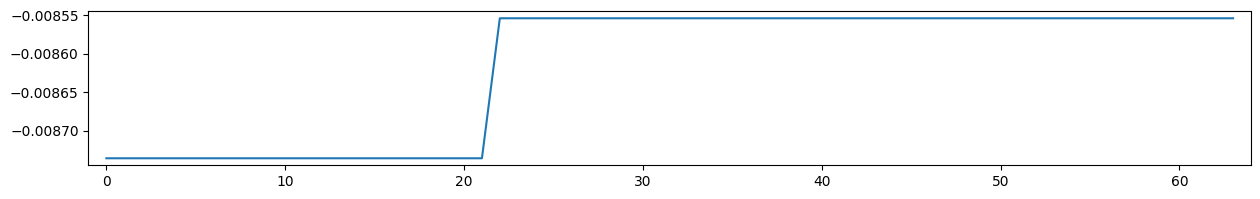

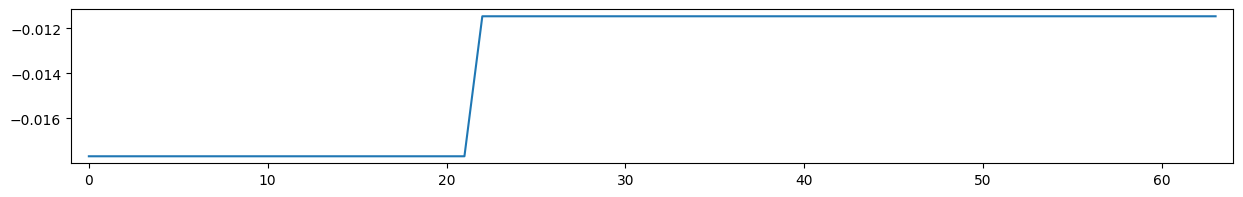

In [7]:
###########################################
# phase correction
###########################################
def phase_corr(symbol, pilot):
    pilot_ofst1 = pilot / symbol[0,pilot_sc]
    pilot_ofst2 = pilot / symbol[1,pilot_sc]
    
    ofst_1 = np.interp(np.arange(fft_size), pilot_sc, pilot_ofst1)
    ofst_2 = np.interp(np.arange(fft_size), pilot_sc, pilot_ofst2)
    
    return np.vstack([symbol[0]*ofst_1, symbol[1]*ofst_2]), (ofst_1,ofst_2)

ofst_1, ofst_2 = phase_corr(payload_symbols[0],freq_pilot[0])[1]

plot_signal(ofst_1.imag)
plot_signal(ofst_2.imag)

payload_symbols = [phase_corr(x,p)[0] for x,p in zip(payload_symbols, freq_pilot[:len(payload_symbols)])]

In [8]:
###########################################
# extract payload
###########################################
data = np.hstack([x[:,payload_sc] for x in payload_symbols])

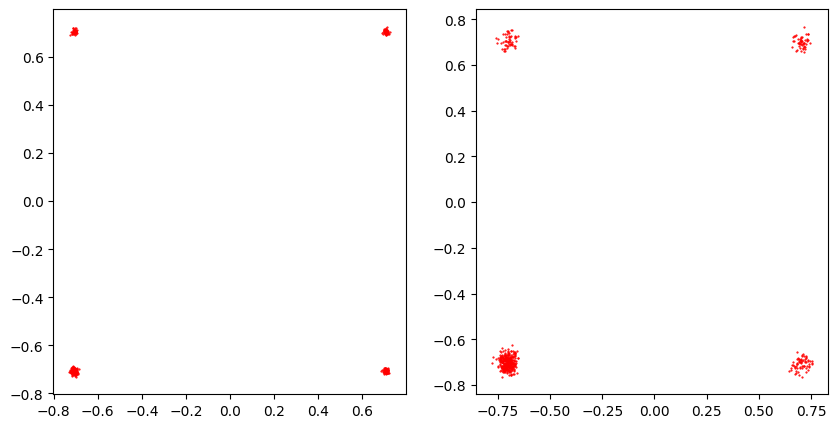

In [9]:
###########################################
# display
###########################################
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

ax1.scatter(data[0,:].real, data[0,:].imag, color='red', s=0.3)
ax2.scatter(data[1,:].real, data[1,:].imag, color='red', s=0.3)
plt.show()

I use the *VHT* to do channel estimation, since it's the only known signal that sends different data to $RX_1$ and $RX_2$. I use least squares regression to estimate the channel $H^{-1}$.

Constellation is already perfect after channel estimation and correction. Using the pilot subcarriers to do subcarrier-specific phase offset after channel correction has marginal effect, because phase offsets are so small.